In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
import mglearn

Text(0, 0.5, 'Feature 1')

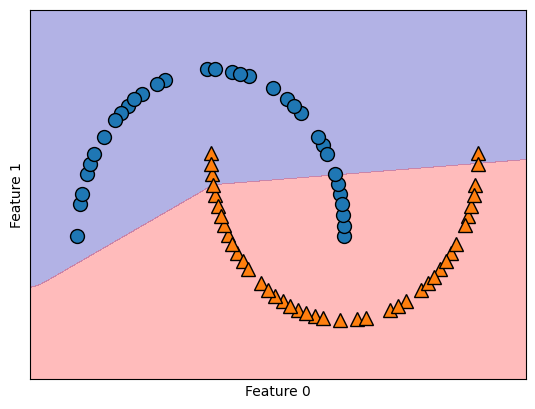

In [64]:
X,y=make_moons(n_samples=100,random_state=42)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
mlp=MLPClassifier(random_state=0,hidden_layer_sizes=[10,10],max_iter=2000).fit(X_train,y_train)

mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# **Without scaled data**

In [67]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
mlp.fit(X_train,y_train)
print("Training score {:.2f}".format(mlp.score(X_train,y_train)))
print("Testing score {:.2f}".format(mlp.score(X_test,y_test)))

Training score 0.92
Testing score 0.94


# With scaled data

In [77]:
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)

X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train

mlp.fit(X_scaled,y_train)
print("Training score {:.2f}".format(mlp.score(X_train_scaled,y_train)))
print("Testing score {:.2f}".format(mlp.score(X_test_scaled,y_test)))

Training score 0.99
Testing score 0.94
